In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Barra de progreso de un proceso
# ------------------------------------------------------------------------------
from tqdm import tqdm

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [2]:
df = pd.read_pickle("datos/2.cas_encoding.pkl")
df.head()

,seasons,atemp,hum,windspeed,casual,yryr_0,yryr_1,mnthmnth_1,mnthmnth_2,mnthmnth_3,...,weekday_numweekday_num_2,weekday_numweekday_num_3,weekday_numweekday_num_4,weekday_numweekday_num_5,weekday_numweekday_num_6,workingday_numworkingday_num_0,workingday_numworkingday_num_1,weathersitweathersit_1,weathersitweathersit_2,weathersitweathersit_3
0,1,18.18125,80.5833,10.749882,331,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,17.68695,69.6087,16.652113,131,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,9.47025,43.7273,16.636703,120,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,10.60610,59.0435,10.739832,108,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1,11.46350,43.6957,12.522300,82,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [3]:
# Separar X e y
X = df.drop("casual", axis = 1)
y = df["casual"]

In [4]:
# Generamos los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
param = {"max_depth": [4,5,6,8,10], 
        "max_features": [3,4,5,6,7],
        "min_samples_split": [5, 10, 15,20],
        "min_samples_leaf": [5,10,15,20]} 

In [6]:
# Definimos un diccionario con los hiperparámetros que deberemos ocupar en el random forest

"""param = {"max_depth": [5,6,8], 
        "max_features": [4,5,6,7],
        "min_samples_split": [5, 10, 15,20],
        "min_samples_leaf": [5,10,15,20]} """

'param = {"max_depth": [5,6,8], \n        "max_features": [4,5,6,7],\n        "min_samples_split": [5, 10, 15,20],\n        "min_samples_leaf": [5,10,15,20]} '

In [7]:
# Aplicamos el GridSearch con estimador de RandomForestRegressor
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [8]:
# Entrenamos el modelo con .fit()
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 8, 10],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [5, 10, 15, 20]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [9]:
# método para que elija el mejor estimador o combinación de valores
bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=10, max_features=7, min_samples_leaf=5,
                      min_samples_split=5)

In [10]:
# Aplicamos el método .predict() para calcular las métricas del mejor modelo.
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [11]:
# Medimos las métricas del random forest
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [12]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Cas_Cod_Random_Forest_1 ")
dt_results

,MAE,MSE,RMSE,R2,set,modelo
0,224.525926,97372.427936,312.045554,0.613001,test,Cas_Cod_Random_Forest_1
1,196.912093,73393.982023,270.913237,0.712438,train,Cas_Cod_Random_Forest_1


In [13]:
df_total_1=pd.read_csv("datos/resultados/1.cas_enc_est_DT_3.csv", index_col=0)
df_total_1

,MAE,MSE,RMSE,R2,set,modelo
2,0.548712,0.574380,0.757879,0.418086,test,Cas_enc_est_3_Decision tree II
3,0.494152,0.466463,0.682981,0.534120,train,Cas_enc_est_3_Decision tree II
4,331.370729,210510.890084,458.814658,0.163341,test,Cas_enc_2_Decision tree II
5,271.696966,137529.542059,370.849757,0.461151,train,Cas_enc_2_Decision tree II
6,248.710180,115775.562086,340.258082,0.539859,test,Cas_enc_Decision tree II
7,253.302844,120989.594521,347.835585,0.525955,train,Cas_enc_Decision tree II


In [14]:
df_total_results = pd.concat([dt_results, df_total_1], axis = 0).reset_index(drop=True)
df_total_results.head(10)

,MAE,MSE,RMSE,R2,set,modelo
0,224.525926,97372.427936,312.045554,0.613001,test,Cas_Cod_Random_Forest_1
1,196.912093,73393.982023,270.913237,0.712438,train,Cas_Cod_Random_Forest_1
2,0.548712,0.574380,0.757879,0.418086,test,Cas_enc_est_3_Decision tree II
3,0.494152,0.466463,0.682981,0.534120,train,Cas_enc_est_3_Decision tree II
4,331.370729,210510.890084,458.814658,0.163341,test,Cas_enc_2_Decision tree II
5,271.696966,137529.542059,370.849757,0.461151,train,Cas_enc_2_Decision tree II
6,248.710180,115775.562086,340.258082,0.539859,test,Cas_enc_Decision tree II
7,253.302844,120989.594521,347.835585,0.525955,train,Cas_enc_Decision tree II


In [15]:
df_total_results.style.background_gradient()

,MAE,MSE,RMSE,R2,set,modelo
0,224.525926,97372.427936,312.045554,0.613001,test,Cas_Cod_Random_Forest_1
1,196.912093,73393.982023,270.913237,0.712438,train,Cas_Cod_Random_Forest_1
2,0.548712,0.574380,0.757879,0.418086,test,Cas_enc_est_3_Decision tree II
3,0.494152,0.466463,0.682981,0.534120,train,Cas_enc_est_3_Decision tree II
4,331.370729,210510.890084,458.814658,0.163341,test,Cas_enc_2_Decision tree II
5,271.696966,137529.542059,370.849757,0.461151,train,Cas_enc_2_Decision tree II
6,248.710180,115775.562086,340.258082,0.539859,test,Cas_enc_Decision tree II
7,253.302844,120989.594521,347.835585,0.525955,train,Cas_enc_Decision tree II


In [16]:
df_total_results.to_csv("datos/resultados/2.cas_enc_est_RF_1.csv")

In [17]:
# vamos a crearnos un dataframe con las variables predictoras según su importancia
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,atemp,0.326917
0,seasons,0.128947
20,weekday_numweekday_num_0,0.103868
2,hum,0.068319
29,weathersitweathersit_1,0.044911
6,mnthmnth_1,0.043728
3,windspeed,0.042436
21,weekday_numweekday_num_1,0.030498
7,mnthmnth_2,0.025340
4,yryr_0,0.024421


In [18]:
importancia_predictores.to_csv("datos/resultados/3.Cas_importancia.csv")

In [19]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

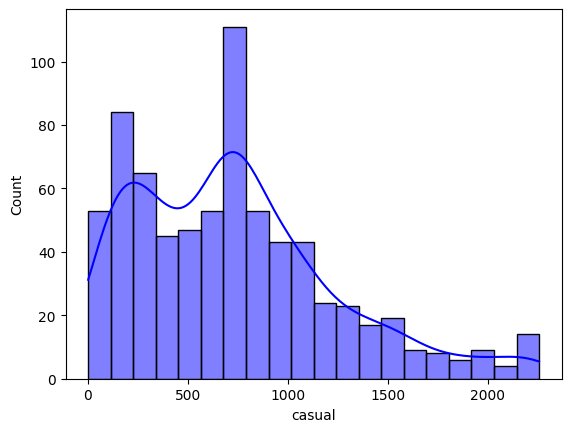

In [20]:
sns.histplot(df["casual"], kde=True, bins=20, color='blue');

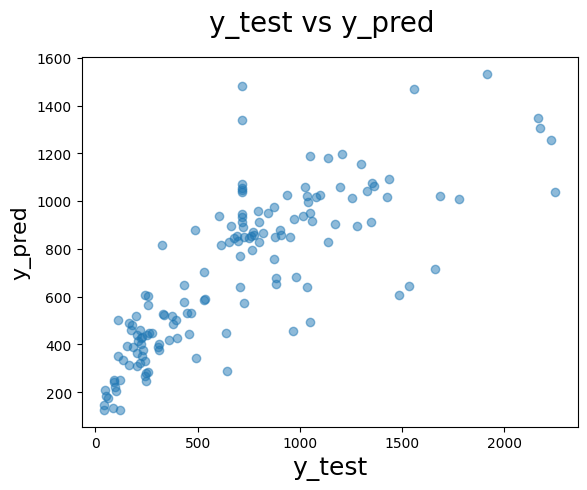

In [21]:
fig = plt.figure()
plt.scatter(y_test, y_pred_test_rf , alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

<AxesSubplot:xlabel='casual', ylabel='Count'>

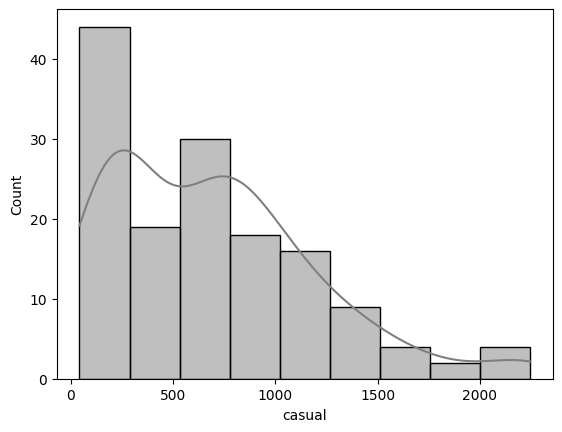

In [22]:
# ploteamos los residuos
sns.histplot(x= y_test,
             color ="grey",
             kde=True)

<AxesSubplot:ylabel='Count'>

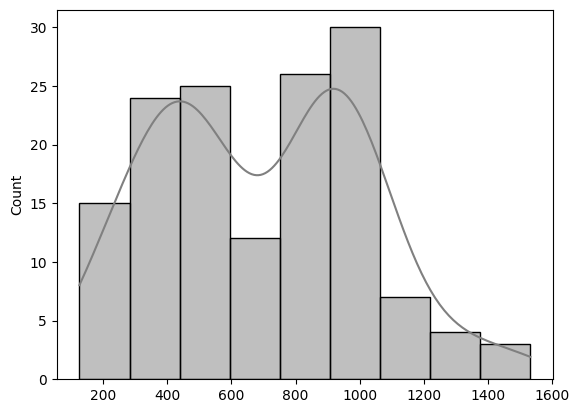

In [23]:
sns.histplot(x= y_pred_test_rf,
             color ="grey",
             kde=True)